<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header">
      <a class="navbar-brand" href="_Oving5.ipynb">Øving 5</a>
    </div>
    <ul class="nav navbar-nav">
      <li ><a href="Generelt%20om%20lister.ipynb">Generelt om lister</a></li>
    <li ><a href="Lett%20og%20blandet.ipynb">Lett og blandet</a></li>
    <li ><a href="Intro%20til%20numpy-arrays.ipynb">Intro til numpy-arrays</a></li>
    <li ><a href="Kodeforstaelse.ipynb">Kodeforståelse</a></li>
    <li ><a href="Vektorer.ipynb">Vektorer</a></li>
    <li ><a href="Lister%20og%20lokker.ipynb">Lister og løkker</a></li>
    <li ><a href="Teoridelen%20paa%20eksamen.ipynb">Teoridelen på eksamen</a></li>
    <li ><a href="Gangetabell%20og%20lister.ipynb">Gangetabell og lister</a></li>
    <li ><a href="Lotto.ipynb">Lotto</a></li>
    <li ><a href="Tannfeen.ipynb">Tannfeen</a></li>
        <li class="active"><a href="Chattebot.ipynb">Chattebot</a></li>
    <li ><a href="Matriseaddisjon.ipynb">Matriseaddisjon</a></li>
    </ul>
  </div>
</nav>

# Numpy Arrays

**Læringsmål:**

* Lister
* Numpy

 


Denne oppgaven er obligatorisk, og er en kjapp introduksjon til en form for lister som ofte gir bedre ytelse og kjøretid enn Pythons innebygde lister. Dette gjelder særlig når man har matrisestrukturer og skal jobbe med store datasett.

NumPy-arrays finnes i pakken numpy, som kan importeres i Jupyter ved å skrive f.eks import numpy as np.
```python
import numpy as np    #numpy as np gjør at vi bare trenger å skrive np.array() og ikke numpy.array() etc.
```

For å løse deloppgavene kan det være lurt å se på [dokumentasjonen til NumPy](https://numpy.org/doc/stable/reference/). 

### a)

Bruk funksjonene **np.array()** og **np.dot()** for å lage en funksjon areOrthogonal(a,b) som tar inn to vanlige lister som representerer to vektorer, konverterer dem til Numpy-arrays og deretter sjekker om vektorene er ortogonale. Funksjonen returnerer altså den boolske verdien True dersom de er ortogonale, og False hvis ikke.

*NB: Du kan anta at de to input-vektorene er av samme lengde og kun inneholder tall.*

***Skriv koden din i boksen under.***

In [5]:
import numpy as np

def areOrthogonal(a, b):
    vec1 = np.array(a)
    vec2 = np.array(b)
    dot = np.dot(vec1, vec2)
    if dot == 0:
        return True
    else:
        return False

arr1 = [0, 1]
arr2 = [1, 0]
print(areOrthogonal(arr1, arr2))

True


#### Hint

Husk fra R2 (ev. 3MX for de som hadde det...) at to vektorer er ortogonale dersom prikkproduktet deres er lik 0.

### b)

Bruk *kun* numpy-funksjonene `np.arange()`, `np.transpose()` og `arr.reshape()` (der **arr** er et objekt av typen numpy.ndarray) for å skape den følgende matrisen. 

Start med å lese om [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.reshape()](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.reshape.html) og [np.transpose()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html). Du skal bruke disse funksjonene i rekkefølge med riktig input for å få resultet nedenfor (**ikke lag arrayen med np.array()**). 

```python
array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])
       ```
       
***Skriv koden din i boksen under.***

In [21]:
import numpy as np

values = np.arange(1,16,1)
reshaped = np.reshape(values, (3, 5))
transposed = np.transpose(reshaped)
print(transposed)

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


### c)

Oppgaven under viser et eksempel på hvordan man kan plotte ting i python. Oppgaven din er å kjøre koden og prøve å forstå hvordan den fungerer.

Koden plotter jordens omløpsbane rundt solen ved bruk av den numeriske algoritmen; Euler-Cromer. Her ser vi for oss et todimensjonalt koordinatsystem med Solen i origo og Jorden som kretser rundt Solen med radius lik 1. 

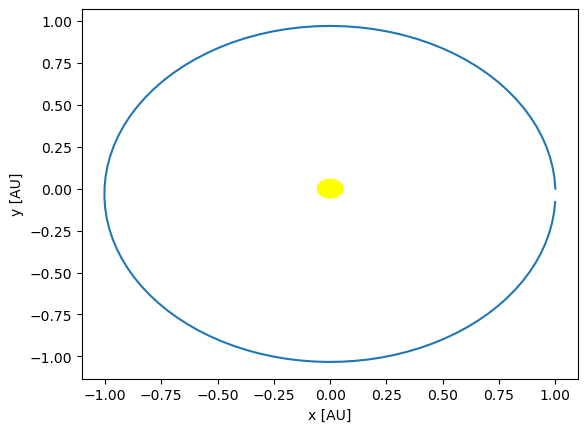

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
def EulerCromer( tmax, x0, y0, v0, u0, m, tau):
    # tmax er tiden jorden bruker rundt solen
    # x0 og y0 er startbetingelser for jordens posisjon
    # v0 og u0 er starbetingelser for farten til jorden
    # m er massen til jorden og tau er steglengden.
 
    N = int(round(tmax/tau))   #np.zeros(N) lager en liste bestående av bare 0ere av lengde N
    x = np.zeros(N)
    y = np.zeros(N)
    u = np.zeros(N)
    v = np.zeros(N)
    radiuser = np.zeros(N)
 
    # startbetingelser
    u[0] = u0
    v[0] = v0
    x[0] = x0
    y[0] = y0
    radiuser[0] = np.sqrt((x[0]) ** 2 + (y[0]) ** 2)
 
    for n in range(1, N):
        u[n] = u[n - 1] - 4 * np.pi ** 2 * x[n - 1] * tau / (radiuser[n - 1] ** 3)
        v[n] = v[n - 1] - 4 * np.pi ** 2 * y[n - 1] * tau / (radiuser[n - 1] ** 3)
        x[n] = x[n - 1] + u[n] * tau
        y[n] = y[n - 1] + v[n] * tau
        radiuser[n] = np.sqrt((x[n]) ** 2 + (y[n]) ** 2)
 
 
    return x, y  # posisjons- og farts-lister
 
# startbetingelser:
x0 = 1    # Tenk deg at solen er i origo og at jorden starter i posisjon(1,0)
y0 = 0
u0 = 0    # startfarten i x-retning er 0
v0 = 2*3.1415623   # startfarten i y-retning er 2*pi
m =  1 / 333480    # dette er massen til Jorden i forhold til massen til Solen
tmax = 1           # Omløpstiden rundt Solen er 1(år)
tau = 0.01         # denne skrittlengden er såpass liten at plottet blir fint nok
 
x1, y1 = EulerCromer(tmax, x0, y0, v0, u0, m, tau)
 
# Plotter banen til planeten rundt sola
plt.figure()
plt.plot(x1, y1)
circle = plt.Circle((0, 0), radius=0.06, fc='yellow')
plt.gca().add_patch(circle)
plt.xlabel(r'x [AU]')
plt.ylabel(r'y [AU]')
plt.show()